This notebook retreives expression at the level of transcript isoforms and displays the absolute and z-score expression across mice and time.

In [1]:
import pandas, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(16, 9)})

# 0. user-defined variables

In [3]:
expression_file = '/home/adrian/projects/reynisfjara/results/tpm/sleuth_TPM_transcript.csv'
annotation_file = '/home/adrian/projects/reynisfjara/results/annotation/annotation.csv'

mice = ['a3922', 'a4774', 'a4775', 'a4776']
time_points = [0, 48, 72]

# 1. read info

## 1.1. read expression

In [4]:
expression = pandas.read_csv(expression_file, sep=',', index_col=0)
expression.head()

,a3922_0h_1,a3922_0h_2,a3922_0h_3,a3922_48h_1,a3922_48h_2,a3922_48h_3,a3922_72h_1,a3922_72h_2,a3922_72h_3,a4774_0h_1,...,a4775_72h_3,a4776_0h_1,a4776_0h_2,a4776_0h_3,a4776_48h_1,a4776_48h_2,a4776_48h_3,a4776_72h_1,a4776_72h_2,a4776_72h_3
ENSMUST00000000001.4,70.858869,67.179056,66.517375,81.861848,77.489075,70.854094,67.129660,72.872443,69.831027,60.885758,...,67.388986,65.794367,69.699430,68.146005,59.799927,66.423357,63.896714,64.310235,64.637999,64.687759
ENSMUST00000000003.13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUST00000000010.8,1.079537,1.021955,0.974321,8.967520,9.990372,8.316247,7.526482,7.826532,7.759516,2.307257,...,3.379726,1.707672,1.093971,1.462489,6.106311,7.989304,6.882189,6.984428,6.731535,7.208402
ENSMUST00000000028.13,5.941797,5.342789,4.883984,20.901199,18.986840,19.882582,16.708858,19.825404,17.077044,7.209192,...,13.155477,2.560126,2.701974,4.207112,5.253471,6.805766,7.318389,7.943657,8.089334,8.466092
ENSMUST00000000033.11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 1.2. read annotation and define MITF isoforms

In [5]:
annotation = pandas.read_csv(annotation_file, sep=',', index_col='ens_gene')
annotation.drop(columns=['Unnamed: 0'], inplace=True)
print(annotation.shape)
annotation.head()

(142438, 4)


,target_id,gene_biotype,description,ext_gene
ens_gene,,,,
ENSMUSG00000064336,ENSMUST00000082387,Mt_tRNA,mitochondrially encoded tRNA phenylalanine [So...,mt-Tf
ENSMUSG00000064337,ENSMUST00000082388,Mt_rRNA,mitochondrially encoded 12S rRNA [Source:MGI S...,mt-Rnr1
ENSMUSG00000064338,ENSMUST00000082389,Mt_tRNA,mitochondrially encoded tRNA valine [Source:MG...,mt-Tv
ENSMUSG00000064339,ENSMUST00000082390,Mt_rRNA,mitochondrially encoded 16S rRNA [Source:MGI S...,mt-Rnr2
ENSMUSG00000064340,ENSMUST00000082391,Mt_tRNA,mitochondrially encoded tRNA leucine 1 [Source...,mt-Tl1


In [6]:
mitf_isoforms = annotation[annotation['ext_gene'] == 'Mitf']['target_id'].to_list()
print(len(mitf_isoforms))

8


# 2. generate figure

## 2.1. retrieve MITF isoforms expression data only

In [7]:
mitf_isoforms_ensembls = []
for ensembl in expression.index:
    root = ensembl.split('.')[0]
    if root in mitf_isoforms:
        mitf_isoforms_ensembls.append(ensembl)
print(mitf_isoforms_ensembls, len(mitf_isoforms_ensembls))

['ENSMUST00000043628.12', 'ENSMUST00000043637.13', 'ENSMUST00000101123.9', 'ENSMUST00000113339.7', 'ENSMUST00000139462.1', 'ENSMUST00000148233.1', 'ENSMUST00000203884.2', 'ENSMUST00000203938.1'] 8


In [8]:
expression_wdf = expression.loc[mitf_isoforms_ensembls, :]
expression_wdf.head()

,a3922_0h_1,a3922_0h_2,a3922_0h_3,a3922_48h_1,a3922_48h_2,a3922_48h_3,a3922_72h_1,a3922_72h_2,a3922_72h_3,a4774_0h_1,...,a4775_72h_3,a4776_0h_1,a4776_0h_2,a4776_0h_3,a4776_48h_1,a4776_48h_2,a4776_48h_3,a4776_72h_1,a4776_72h_2,a4776_72h_3
ENSMUST00000043628.12,125.440076,193.081904,174.039741,107.906259,103.558838,104.762471,105.569041,81.441011,89.614063,431.557603,...,319.651592,403.970136,418.459254,408.174162,402.929876,424.425111,389.427973,417.006334,422.984352,437.605506
ENSMUST00000043637.13,295.104762,267.879850,274.388904,161.231443,158.704144,155.256272,158.484335,158.200607,158.492283,18.639578,...,322.342618,16.062024,17.186064,17.618330,481.215120,502.070250,484.793617,561.191614,546.165196,554.383368
ENSMUST00000101123.9,0.000000,0.211357,0.000000,0.000000,0.000000,0.000000,0.130696,0.000000,0.000000,0.137628,...,0.077122,0.000000,0.000000,0.000000,0.056525,0.000000,0.000000,0.072165,0.063471,0.000000
ENSMUST00000113339.7,0.134316,0.000000,0.052784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.287430,...,0.000000,0.000000,0.115190,0.255612,0.000000,0.000000,0.070438,0.000000,0.000000,0.000000
ENSMUST00000139462.1,2.087323,6.282351,6.149896,2.235159,4.760988,2.911630,3.065197,2.185849,2.789231,3.091328,...,4.425406,6.820136,4.779615,3.643243,7.077809,8.470060,7.212124,9.399035,9.809199,11.755710


## 2.2. build figure

0 a3922 ENSMUST00000043628.12
48 a3922 ENSMUST00000043628.12
72 a3922 ENSMUST00000043628.12
0 a4774 ENSMUST00000043628.12
48 a4774 ENSMUST00000043628.12
72 a4774 ENSMUST00000043628.12
0 a4775 ENSMUST00000043628.12
48 a4775 ENSMUST00000043628.12
72 a4775 ENSMUST00000043628.12
0 a4776 ENSMUST00000043628.12
48 a4776 ENSMUST00000043628.12
72 a4776 ENSMUST00000043628.12


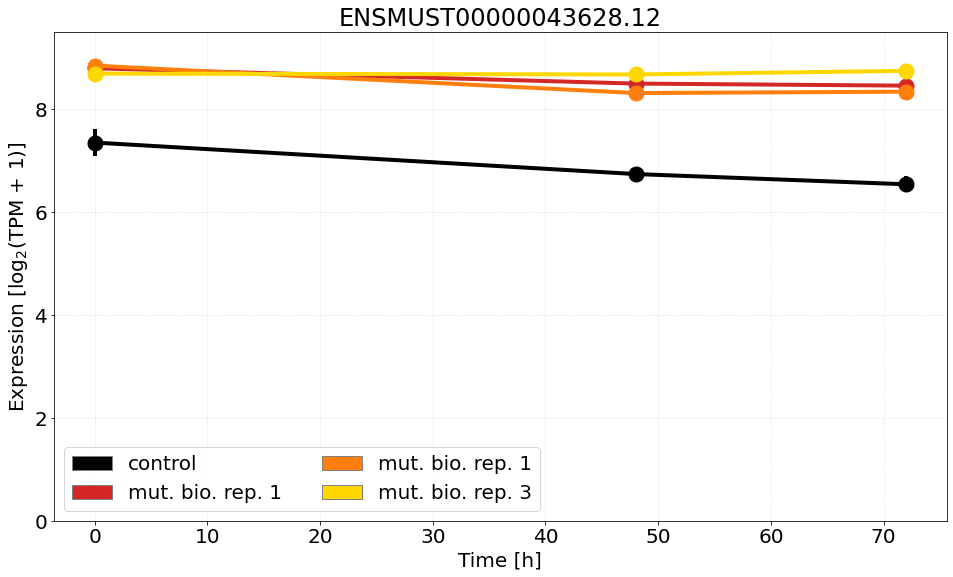

0 a3922 ENSMUST00000043637.13
48 a3922 ENSMUST00000043637.13
72 a3922 ENSMUST00000043637.13
0 a4774 ENSMUST00000043637.13
48 a4774 ENSMUST00000043637.13
72 a4774 ENSMUST00000043637.13
0 a4775 ENSMUST00000043637.13
48 a4775 ENSMUST00000043637.13
72 a4775 ENSMUST00000043637.13
0 a4776 ENSMUST00000043637.13
48 a4776 ENSMUST00000043637.13
72 a4776 ENSMUST00000043637.13


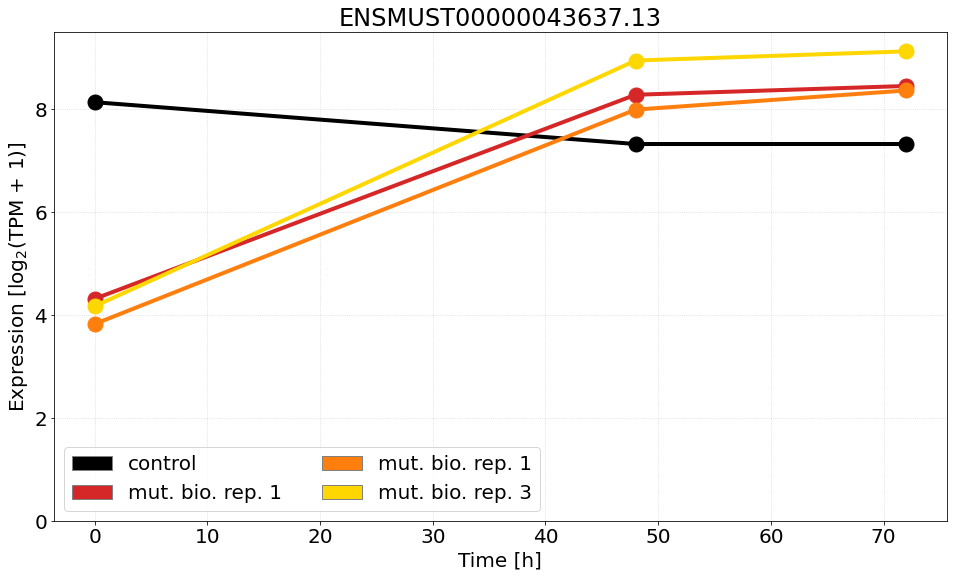

0 a3922 ENSMUST00000101123.9
48 a3922 ENSMUST00000101123.9
72 a3922 ENSMUST00000101123.9
0 a4774 ENSMUST00000101123.9
48 a4774 ENSMUST00000101123.9
72 a4774 ENSMUST00000101123.9
0 a4775 ENSMUST00000101123.9
48 a4775 ENSMUST00000101123.9
72 a4775 ENSMUST00000101123.9
0 a4776 ENSMUST00000101123.9
48 a4776 ENSMUST00000101123.9
72 a4776 ENSMUST00000101123.9


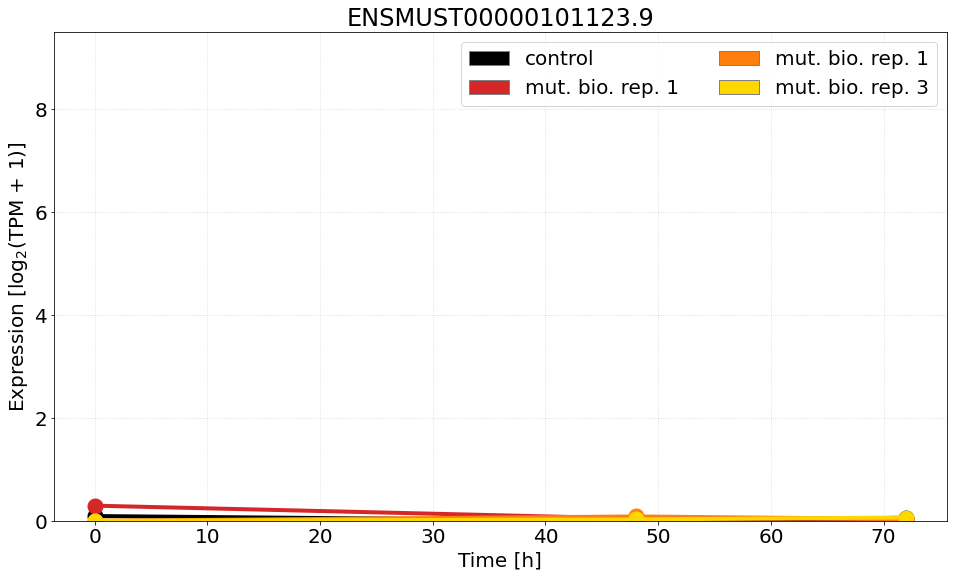

0 a3922 ENSMUST00000113339.7
48 a3922 ENSMUST00000113339.7
72 a3922 ENSMUST00000113339.7
0 a4774 ENSMUST00000113339.7
48 a4774 ENSMUST00000113339.7
72 a4774 ENSMUST00000113339.7
0 a4775 ENSMUST00000113339.7
48 a4775 ENSMUST00000113339.7
72 a4775 ENSMUST00000113339.7
0 a4776 ENSMUST00000113339.7
48 a4776 ENSMUST00000113339.7
72 a4776 ENSMUST00000113339.7


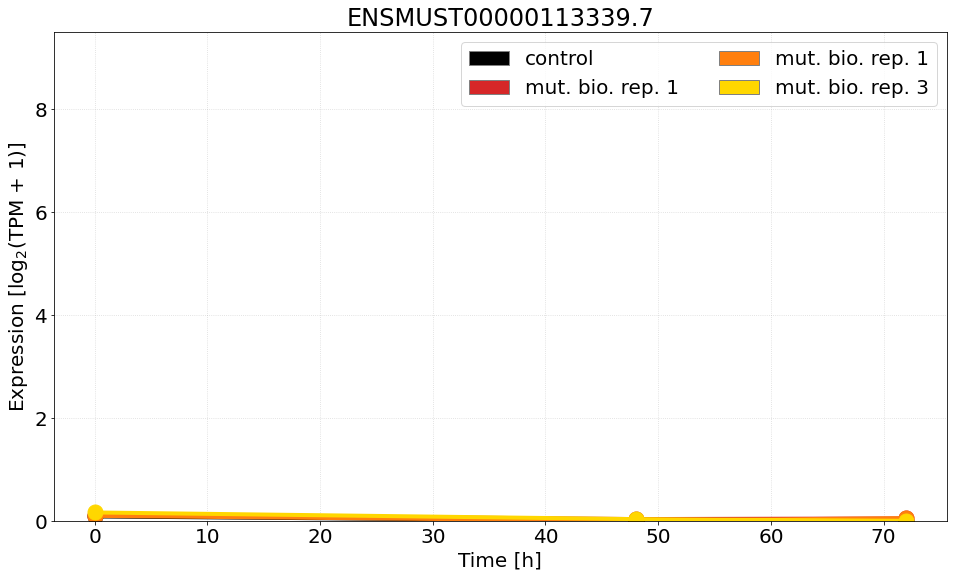

0 a3922 ENSMUST00000139462.1
48 a3922 ENSMUST00000139462.1
72 a3922 ENSMUST00000139462.1
0 a4774 ENSMUST00000139462.1
48 a4774 ENSMUST00000139462.1
72 a4774 ENSMUST00000139462.1
0 a4775 ENSMUST00000139462.1
48 a4775 ENSMUST00000139462.1
72 a4775 ENSMUST00000139462.1
0 a4776 ENSMUST00000139462.1
48 a4776 ENSMUST00000139462.1
72 a4776 ENSMUST00000139462.1


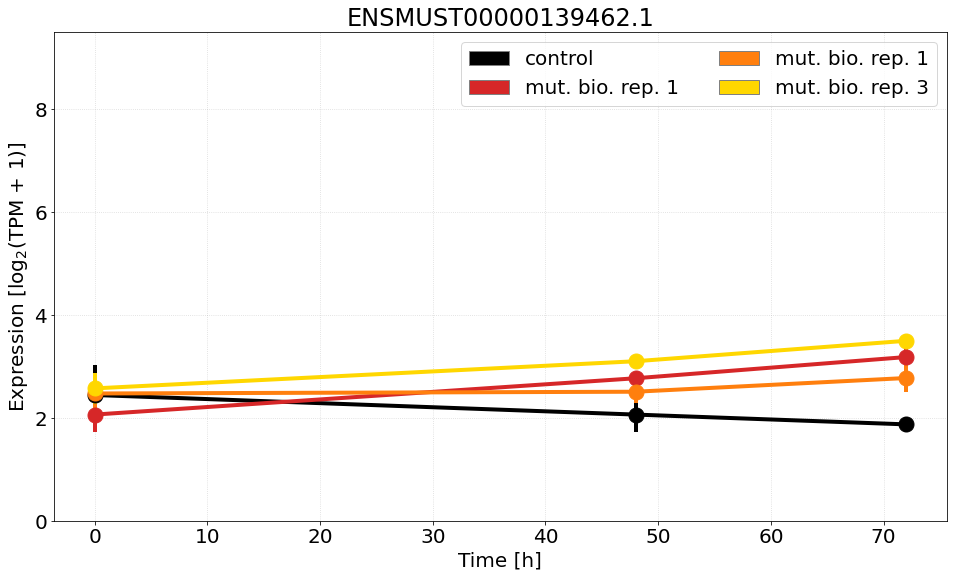

0 a3922 ENSMUST00000148233.1
48 a3922 ENSMUST00000148233.1
72 a3922 ENSMUST00000148233.1
0 a4774 ENSMUST00000148233.1
48 a4774 ENSMUST00000148233.1
72 a4774 ENSMUST00000148233.1
0 a4775 ENSMUST00000148233.1
48 a4775 ENSMUST00000148233.1
72 a4775 ENSMUST00000148233.1
0 a4776 ENSMUST00000148233.1
48 a4776 ENSMUST00000148233.1
72 a4776 ENSMUST00000148233.1


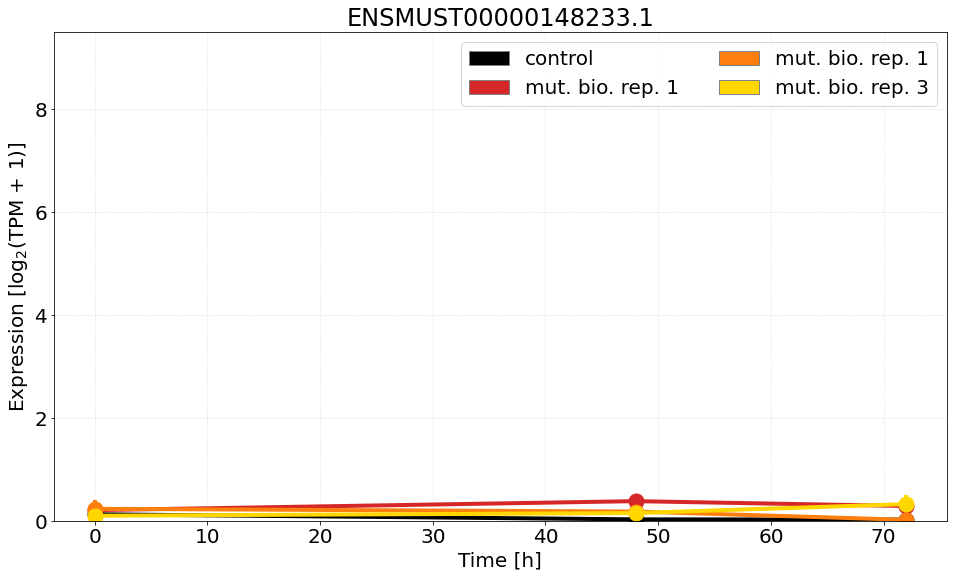

0 a3922 ENSMUST00000203884.2
48 a3922 ENSMUST00000203884.2
72 a3922 ENSMUST00000203884.2
0 a4774 ENSMUST00000203884.2
48 a4774 ENSMUST00000203884.2
72 a4774 ENSMUST00000203884.2
0 a4775 ENSMUST00000203884.2
48 a4775 ENSMUST00000203884.2
72 a4775 ENSMUST00000203884.2
0 a4776 ENSMUST00000203884.2
48 a4776 ENSMUST00000203884.2
72 a4776 ENSMUST00000203884.2


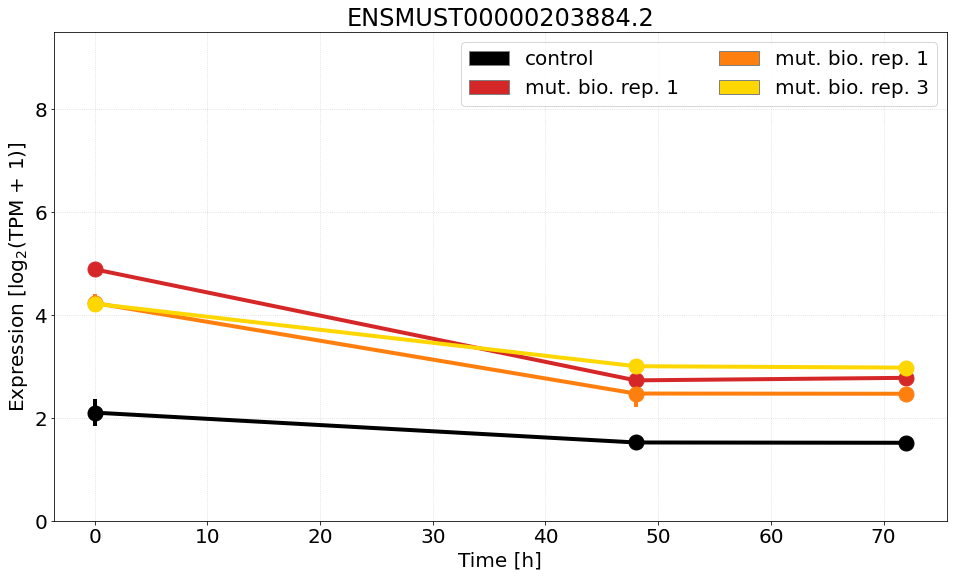

0 a3922 ENSMUST00000203938.1
48 a3922 ENSMUST00000203938.1
72 a3922 ENSMUST00000203938.1
0 a4774 ENSMUST00000203938.1
48 a4774 ENSMUST00000203938.1
72 a4774 ENSMUST00000203938.1
0 a4775 ENSMUST00000203938.1
48 a4775 ENSMUST00000203938.1
72 a4775 ENSMUST00000203938.1
0 a4776 ENSMUST00000203938.1
48 a4776 ENSMUST00000203938.1
72 a4776 ENSMUST00000203938.1


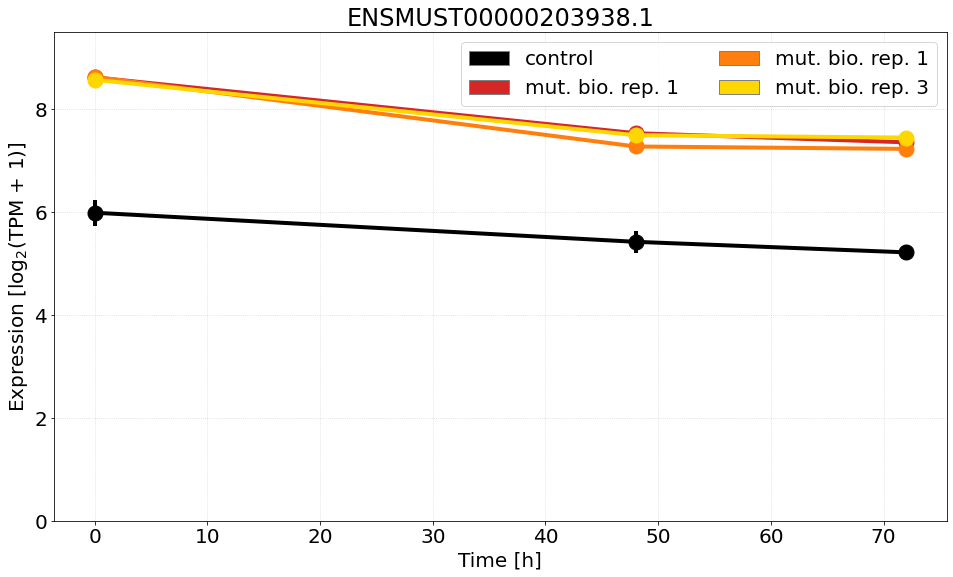

In [9]:
the_colors = ['black', 'tab:red', 'tab:orange', 'gold']

for isoform in expression_wdf.index:
    for mouse in mice:
        trajectory_mean = []; trajectory_std = []
        for time_point in time_points:
            print(time_point, mouse, isoform)
            labels = ['{}_{}h_{}'.format(mouse, time_point, i+1) for i in range(3)]
            log2tpms = []
            for label in labels:
                try:
                    tpm = expression_wdf.loc[isoform, label]
                    log2tpm = numpy.log2(tpm + 1)
                    log2tpms.append(log2tpm)
                except:
                    pass
            
            plotting_mean = numpy.mean(log2tpms)
            plotting_std = numpy.std(log2tpms)
            
            trajectory_mean.append(plotting_mean)
            trajectory_std.append(plotting_std)
        
        # plot trajectory
        matplotlib.pyplot.errorbar(time_points, trajectory_mean, yerr=trajectory_std, fmt='-o', lw=4, ms=15, color=the_colors[mice.index(mouse)])
    
    # legend
    legend_elements = [
    matplotlib.patches.Patch(facecolor='black', edgecolor='gray'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='gray'),
    matplotlib.patches.Patch(facecolor='tab:orange', edgecolor='gray'),
        matplotlib.patches.Patch(facecolor='gold', edgecolor='gray')
    ]
    matplotlib.pyplot.legend(legend_elements, ['control', 'mut. bio. rep. 1', 'mut. bio. rep. 1', 'mut. bio. rep. 3'], ncol=2)

    # close figure
    matplotlib.pyplot.title(isoform)
    matplotlib.pyplot.xlabel('Time [h]')
    matplotlib.pyplot.ylabel('Expression [log$_2$(TPM + 1)]')
    matplotlib.pyplot.grid(alpha=0.5, ls=':')
    matplotlib.pyplot.ylim([0, 9.5])
    matplotlib.pyplot.show()